In [1]:
import pickle
import joblib
import numpy as np
import pandas as pd 
import sklearn.ensemble as ek
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
# Load the data from a CSV file
data = pd.read_csv("data1.csv")

In [9]:
data.dropna(inplace=True)

In [10]:
# data preprocessing
x = data.drop(['md5', 'legitimate'], axis=1).values
y = data['legitimate'].values

In [11]:
# Features we need for DTs
extratrees = ek.ExtraTreesClassifier().fit(x, y)
model = SelectFromModel(extratrees, prefit=True)
x_new = model.transform(x)
nbfeatures = x_new.shape[1]

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2)

In [15]:
features = []
index = np.argsort(extratrees.feature_importances_)[::-1][:nbfeatures]
for f in range(nbfeatures):
    #     print("%d. feature %s (%f)" % (f + 1, dataset.columns[2+index[f]], extratrees.feature_importances_[index[f]]))
    features.append(data.columns[2 + f])

In [23]:
model = ek.RandomForestClassifier(n_estimators=33)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Accuracy:", (score * 100), '%')

Accuracy: 99.98151143979662 %


In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28063
           1       1.00      1.00      1.00     15207

    accuracy                           1.00     43270
   macro avg       1.00      1.00      1.00     43270
weighted avg       1.00      1.00      1.00     43270



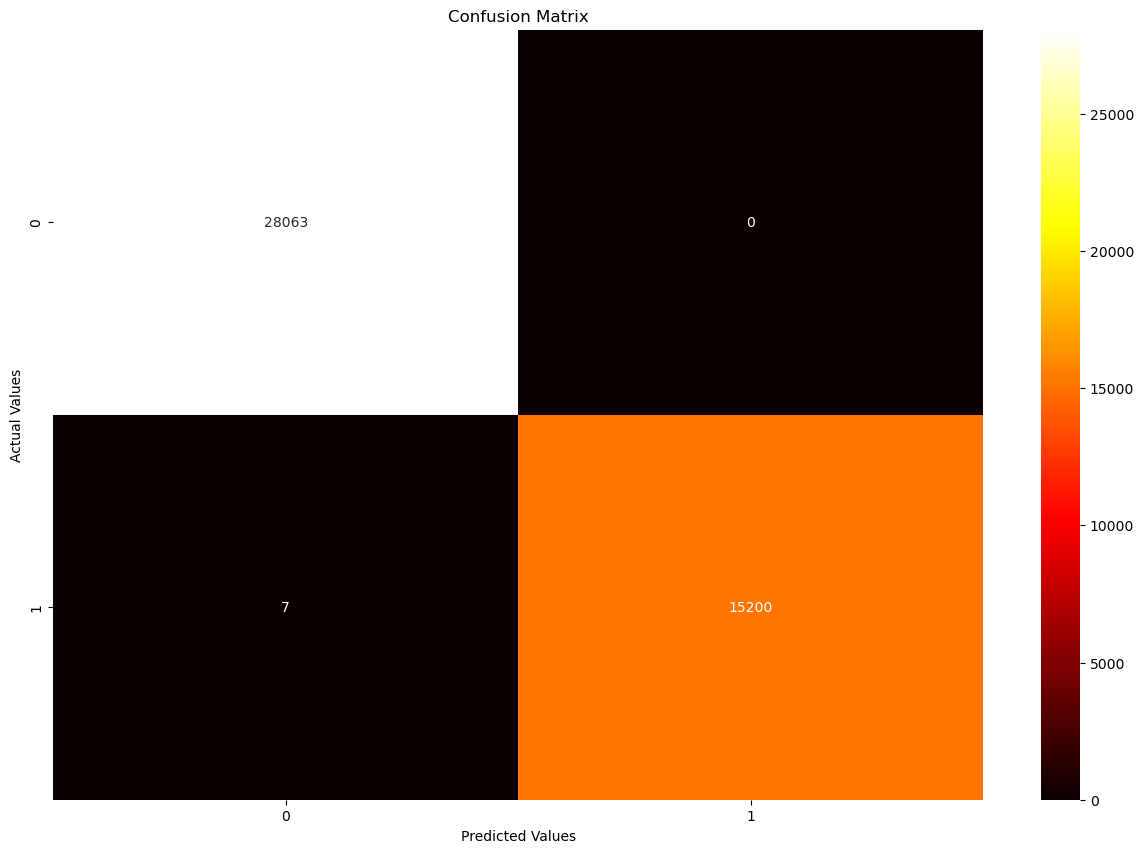

In [26]:
print(classification_report(y_test,y_pred))

cf=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(15,10))
sns.heatmap(cf,annot=True, fmt='g', cmap='hot')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [30]:
# Save the trained model to a binary file
joblib.dump(model, "model.pkl")

['model.pkl']

In [31]:
open('features.pkl', 'wb').write(pickle.dumps(features))

251

In [33]:
# False Positives and Negatives
res = model.predict(x_new)
mt = confusion_matrix(y, res)
print("False positive rate : %f %%" % ((mt[0][1] / float(sum(mt[0]))) * 100))
print('False negative rate : %f %%' % (mt[1][0] / float(sum(mt[1])) * 100))

False positive rate : 0.000000 %
False negative rate : 0.009271 %
